# San Francisco Crime Classification - Machine Learning

This ipython notebook consists of the models and algorithms that were run for the Capstone Project San Francisco Crime Classification. It also contains feature engineering that were performed for the project. Two machine learning algorithms were applied and the respective Kaggle score is mentioned in this notebook.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [12]:
train = pd.read_csv('/Users/Anushree/Desktop/Springboard/Capstone 2/data_sf/train.csv')
test = pd.read_csv('/Users/Anushree/Desktop/Springboard/Capstone 2/data_sf/test.csv')

In [13]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


## Feature Engineering

The features that are going to be used to build our models are X,Y, District_num, add_num, minute, hour, Day, year, day_week, DayofYear,weekofyear, weekend(fri,sat,sun), seasons(Fall, Winter, Spring, Summer). We'll be using sklearn's preprocessing to scale X(latitude) and Y(Longitude) and standarized the year by subtracting it with 2003 that would make 2003 as the baseline year.

In [4]:
import datetime as dt

In [27]:
d = pd.to_datetime(train['Dates'])

Using the date, I derived features such as month, hour,dayofyear, weekofyear, minute,day,dayofweek,.

In [6]:
train['month'] = d.dt.month

In [7]:
train['hour'] = d.dt.hour

In [8]:
#train['year'] = d.dt.year

In [9]:
train['DayOfYear'] = d.dt.dayofyear

In [10]:
train['WeekOfYear'] = d.dt.weekofyear

In [11]:
train['minute'] = d.dt.minute

In [12]:
train['Day'] = d.dt.day

In [14]:
#weekdays = {'Monday':0., 'Tuesday':1., 'Wednesday':2., 'Thursday': 3., 'Friday':4., 'Saturday':5., 'Sunday':6.}

In [15]:
#train['hour'] = list(map(lambda x: float(int(x.split(' ')[1].split(':')[0])),train.Dates))
#test['hour'] = list(map(lambda x: float(int(x.split(' ')[1].split(':')[0])),test.Dates))

In [16]:
#train['minute'] = list(map(lambda x: float(int(x.split(' ')[1].split(':')[1])),train.Dates))
#test['minute'] = list(map(lambda x: float(int(x.split(' ')[1].split(':')[1])),test.Dates))

In [17]:
#train['month'] = list(map(lambda x: float(x.split(' ')[0].split('-')[1]), train.Dates))
#test['month'] = list(map(lambda x: float(x.split(' ')[0].split('-')[1]), test.Dates))

In [18]:
#train['Day'] = list(map(lambda x: float(x.split(' ')[0].split('-')[2]), train.Dates))
test['Day'] = list(map(lambda x: float(x.split(' ')[0].split('-')[2]), test.Dates))

In [19]:
#train['Day_week'] = [float(weekdays[w]) for w in train.DayOfWeek]
#test['Day_week'] = [float(weekdays[w]) for w in test.DayOfWeek]

In [20]:
districts = {c:i for i,c in enumerate(train['PdDistrict'].unique())}

By taking the unique PD District and converting them into float categories.

In [21]:
train['District_num'] = [float(districts[t]) for t in train.PdDistrict]
test['District_num'] = [float(districts[t]) for t in test.PdDistrict]

Converting the unique categoric of crimes into numeric categories.

In [22]:
categories = {c:i for i,c in enumerate(train['Category'].unique())}

In [23]:
train['Category_Num'] = [float(categories[t]) for t in train.Category]

Standardizing the year, bu=y subtracting it with 2003, thereby taking 2003 as the baseline.

In [24]:
train['Year'] = list(map(lambda x: float(x.split(' ')[0].split('-')[0])-2003., train.Dates))

In [24]:
#train['Category_num'] = pd.Categorical.from_array(train['Category']).codes

In [25]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,hour,minute,month,Day,Day_week,District_num,Category_Num,Year
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23.0,53.0,5.0,13.0,2.0,0.0,0.0,12.0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23.0,53.0,5.0,13.0,2.0,0.0,1.0,12.0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,23.0,33.0,5.0,13.0,2.0,0.0,1.0,12.0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,23.0,30.0,5.0,13.0,2.0,0.0,2.0,12.0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,23.0,30.0,5.0,13.0,2.0,1.0,2.0,12.0


In [26]:
#train['District_num']=pd.Categorical.from_array(train['PdDistrict']).codes

In [27]:
train.head()

In [28]:
train['Day_week']= d.dt.dayofweek

In [29]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,DayOfYear,WeekOfYear,hour,minute,month,Day,Day_week,District_num,Category_Num,Year
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,133,20,23.0,53.0,5.0,13.0,2.0,0.0,0.0,12.0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,133,20,23.0,53.0,5.0,13.0,2.0,0.0,1.0,12.0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,133,20,23.0,33.0,5.0,13.0,2.0,0.0,1.0,12.0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,133,20,23.0,30.0,5.0,13.0,2.0,0.0,2.0,12.0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,133,20,23.0,30.0,5.0,13.0,2.0,1.0,2.0,12.0


Using the dayofweek column to get new fri,sat,sun columns and using all these columns in the weekend feature.

In [29]:
train["Fri"]=np.where(train.DayOfWeek=="Friday",1,0)
train["Sat"]=np.where(train.DayOfWeek=="Saturday",1,0)
train["Sun"]=np.where(train.DayOfWeek=="Sunday",1,0)
train["weekend"]=train['Fri']+train['Sat']+train['Sun']

In [31]:
#train.head()

Deriving a season feature by defining a get_season function. There are 4 features in this. Fall, Winter, Spring,Summer.

In [30]:
def get_season(x):
    summer=0
    fall=0
    winter=0
    spring=0
    if(x in [5,6,7]):
        summer =1
    if(x in [8,9,10]):
        fall=1
    if(x in[11,0,1]):
        winter=1
    if(x in[2,3,4]):
        spring=1
    return summer,fall,winter,spring

In [31]:
train["summer"],train["fall"],train["winter"],train["spring"]=zip(*train["month"].apply(get_season))

In [32]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,hour,...,Category_Num,Year,Fri,Sat,Sun,weekend,summer,fall,winter,spring
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23.0,...,0.0,12.0,0,0,0,0,1,0,0,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23.0,...,1.0,12.0,0,0,0,0,1,0,0,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,23.0,...,1.0,12.0,0,0,0,0,1,0,0,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,23.0,...,2.0,12.0,0,0,0,0,1,0,0,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,23.0,...,2.0,12.0,0,0,0,0,1,0,0,0


In [33]:
from sklearn import preprocessing

In [34]:
#xy = preprocessing.StandardScaler()

In [35]:
#xy.fit(train[['X','Y']])
#train[['X','Y']]= xy.transform(train[['X','Y']])

Using the sklearn preprocessing to scale the latitude and longitude using SF's co-ordinates.

In [36]:
train['X'] = preprocessing.scale(list(map(lambda x: x+122.4194, train.X)))
train['Y'] = preprocessing.scale(list(map(lambda x: x-37.7749, train.Y)))

In [37]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,hour,...,Category_Num,Year,Fri,Sat,Sun,weekend,summer,fall,winter,spring
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-0.107902,0.007832,23.0,...,0.0,12.0,0,0,0,0,1,0,0,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-0.107902,0.007832,23.0,...,1.0,12.0,0,0,0,0,1,0,0,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-0.057541,0.064335,23.0,...,1.0,12.0,0,0,0,0,1,0,0,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-0.144262,0.065338,23.0,...,2.0,12.0,0,0,0,0,1,0,0,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-0.531112,0.001140,23.0,...,2.0,12.0,0,0,0,0,1,0,0,0


Defining an add_num feature using the define_address function. The address was divided into two categories, residential(0) and intersection(1).

In [38]:
def define_address(Address):
    addr_type=0.
    if '/' in Address and 'of' not in Address:
        addr_type =1.
    else:
        addr_type=0.
    return addr_type

In [39]:
train['add_num']= list(map(define_address,train.Address))

In [40]:
test['add_num']= list(map(define_address,test.Address))

In [43]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,DayOfYear,...,Year,Fri,Sat,Sun,weekend,summer,fall,winter,spring,add_num
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-0.107902,0.007832,133,...,12.0,0,0,0,0,1,0,0,0,1.0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-0.107902,0.007832,133,...,12.0,0,0,0,0,1,0,0,0,1.0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-0.057541,0.064335,133,...,12.0,0,0,0,0,1,0,0,0,1.0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-0.144262,0.065338,133,...,12.0,0,0,0,0,1,0,0,0,0.0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-0.531112,0.001140,133,...,12.0,0,0,0,0,1,0,0,0,0.0


Deriving the same features as the train for the test set as well. 

In [41]:
e= pd.to_datetime(test['Dates'])

In [45]:
test['month'] = e.dt.month

In [46]:
test['hour'] = e.dt.hour

In [47]:
#test['year'] = e.dt.year

In [48]:
test['minute'] = e.dt.minute

In [49]:
test['DayOfYear'] = e.dt.dayofyear

In [42]:
test['Day_week']= e.dt.dayofweek

In [43]:
test['WeekOfYear'] = e.dt.weekofyear

In [52]:
test['Day'] = e.dt.day

In [53]:
#test['District_num']=pd.Categorical.from_array(test['PdDistrict']).codes

In [44]:
test["Fri"]=np.where(test.DayOfWeek=="Friday",1,0)
test["Sat"]=np.where(test.DayOfWeek=="Saturday",1,0)
test["Sun"]=np.where(test.DayOfWeek=="Sunday",1,0)
test["weekend"]=test['Fri']+test['Sat']+test['Sun']

In [45]:
test["summer"],test["fall"],test["winter"],test["spring"]=zip(*test["month"].apply(get_season))

In [46]:
test['X'] = preprocessing.scale(list(map(lambda x: x+122.4194, test.X)))
test['Y'] = preprocessing.scale(list(map(lambda x: x-37.7749, test.Y)))

In [47]:
test['Year'] = list(map(lambda x: float(x.split(' ')[0].split('-')[0])-2003., test.Dates))

In [58]:
test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,hour,minute,month,...,WeekOfYear,Fri,Sat,Sun,weekend,summer,fall,winter,spring,Year
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,0.745700,-0.075130,23.0,59.0,5.0,...,19,0,0,1,1,1,0,0,0,12.0
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,1.005982,-0.080531,23.0,51.0,5.0,...,19,0,0,1,1,1,0,0,0,12.0
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-0.106786,0.042772,23.0,50.0,5.0,...,19,0,0,1,1,1,0,0,0,12.0
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-0.474449,-0.103262,23.0,45.0,5.0,...,19,0,0,1,1,1,0,0,0,12.0
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-0.474449,-0.103262,23.0,45.0,5.0,...,19,0,0,1,1,1,0,0,0,12.0


In [59]:
train.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'DayOfYear', 'WeekOfYear', 'hour',
       'minute', 'month', 'Day', 'Day_week', 'District_num', 'Category_Num',
       'Year', 'Fri', 'Sat', 'Sun', 'weekend', 'summer', 'fall', 'winter',
       'spring', 'add_num'],
      dtype='object')

In [60]:
#X=['X','Y','month','year','hour','DayOfYear','WeekOfYear','minute','Fri','Sat','Sun','weekend',
   #'summer','fall','winter','spring','add_num','PdDistrict']

In [61]:
#train['hour']=train['hour'].astype(float)

In [62]:
#train['minute'] = train['minute'].astype(float)

In [63]:
#train['month'] = train['month'].astype(float)

In [64]:
#train['District_num'] = train['District_num'].astype(float)

In [65]:
#train['Day_week'] = train['Day_week'].astype(float)

In [66]:
#train['Day'] = train['Day'].astype(float)

In [67]:
#train['Category_num'] = train['Category_num'].astype(float)

In [68]:
#train.dtypes

In [69]:
#test['hour']=test['hour'].astype(float)

In [70]:
#test['month'] = test['month'].astype(float)

In [71]:
#test['minute'] = test['minute'].astype(float)

In [72]:
#test['month'] = test['month'].astype(float)

In [73]:
#test['Day_week'] = test['Day_week'].astype(float)

In [74]:
#test['Day'] = test['Day'].astype(float)

In [48]:
#making a list of location features
X_loc = ['X', 'Y', 'District_num', 'add_num']

In [49]:
#time
X_time = ['minute', 'hour']

In [50]:
#date
X_date = ['Year','month', 'Day', 'Day_week']

In [51]:
X_all =  X_loc + X_time + X_date

In [79]:
X=['X', 'Y', 'District_num', 'add_num','minute', 'hour','DayOfYear','Year','month', 'Day', 'Day_week',
   'WeekOfYear','Fri','Sat','Sun','weekend','summer','fall','winter','spring']

In [52]:
Y='Category_Num'

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
#Random Forest Classifier with X_all as features
clfrf = RandomForestClassifier(max_features="log2", max_depth=11, n_estimators=24,
                             min_samples_split=1000, oob_score=True)

In [93]:
#fitting
clfrf.fit(train[X_all], train[Y])

/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=11, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=1000, min_weight_fraction_leaf=0.0,
            n_estimators=24, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [94]:
#predictions and the probablities
pred = clfrf.predict_proba(test[X_all])

In [95]:
pred

array([[  5.37974869e-02,   1.31111527e-01,   9.60630018e-02, ...,
          0.00000000e+00,   1.12291415e-02,   0.00000000e+00],
       [  8.34620147e-02,   4.69249445e-01,   3.75938434e-02, ...,
          0.00000000e+00,   4.32742767e-03,   0.00000000e+00],
       [  4.49894514e-02,   1.02987452e-01,   2.21359805e-01, ...,
          0.00000000e+00,   6.51959667e-03,   1.24862651e-05],
       ..., 
       [  2.19879043e-02,   1.28413984e-01,   1.14503566e-01, ...,
          0.00000000e+00,   1.60996914e-03,   0.00000000e+00],
       [  3.73142011e-02,   1.30867133e-01,   9.99430749e-02, ...,
          0.00000000e+00,   3.14956922e-03,   4.40497586e-06],
       [  1.38609205e-02,   1.08848203e-01,   1.35331784e-01, ...,
          0.00000000e+00,   7.82791051e-04,   0.00000000e+00]])

In [96]:
#feature importances
importances_rf = clfrf.feature_importances_

In [97]:
std_rf = np.std([tree.feature_importances_ for tree in clfrf.estimators_],axis=0)

In [98]:
indices_rf = np.argsort(importances_rf)[::-1]

In [99]:
for f in range(train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices_rf[f], importances_rf[indices_rf[f]]))


1. feature 4 (0.252258)
2. feature 1 (0.216556)
3. feature 0 (0.156770)
4. feature 3 (0.136323)
5. feature 2 (0.095299)
6. feature 5 (0.079262)
7. feature 6 (0.053595)
8. feature 9 (0.005433)
9. feature 8 (0.002659)
10. feature 7 (0.001845)


IndexError: index 10 is out of bounds for axis 0 with size 10

In [100]:
X_all[7]

'month'

In [101]:
X_all[1]

'Y'

In [102]:
X_all[0]

'X'

In [103]:
X_all[4]

'minute'

In [104]:
X_all[3]

'add_num'

In [105]:
X_all[2]

'District_num'

In [106]:
X_all[5]

'hour'

Top 5 features: 4-minute, 1-Y(longitude), 0-X(latitude), 3-add_num(address), 2-district_num(PdDistrict)

In [107]:
submission_rf = pd.DataFrame({cat_rev[p] : [pred[i][p] for i in range(len(pred))] for p in range(len(pred[0]))})

In [108]:
submission_rf['Id'] = [i for i in range(len(submission_rf))]

In [109]:
submission_rf = submission_rf[['Id'] + sorted(train['Category'].unique())]
print(submission_rf.head())

   Id     ARSON   ASSAULT  BAD CHECKS   BRIBERY  BURGLARY  DISORDERLY CONDUCT  \
0   0  0.002636  0.140562    0.000009  0.000759  0.033386            0.002934   
1   1  0.001622  0.064640    0.000029  0.000425  0.003462            0.002865   
2   2  0.002752  0.111585    0.000222  0.000424  0.063538            0.003524   
3   3  0.002703  0.141311    0.000065  0.000743  0.034892            0.004121   
4   4  0.002703  0.141311    0.000065  0.000743  0.034892            0.004121   

   DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  DRUNKENNESS     ...       \
0                     0.004053       0.050634     0.006072     ...        
1                     0.007195       0.087450     0.004789     ...        
2                     0.002979       0.037060     0.008270     ...        
3                     0.003225       0.044802     0.006712     ...        
4                     0.003225       0.044802     0.006712     ...        

   SEX OFFENSES NON FORCIBLE  STOLEN PROPERTY   SUICIDE  SUSPI

In [110]:
# Kaggle Score : 2.38
submission_rf.to_csv('submission_rf.csv.gz', index=False, compression='gzip')

In [5]:
from sklearn.ensemble import AdaBoostClassifier

In [112]:
#AdaBoost Classifier with X_all as features
clfada = AdaBoostClassifier( n_estimators=24,random_state=True)

In [113]:
#fitting
clfada.fit(train[X_all], train[Y])

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=24, random_state=True)

In [114]:
#prediction and probablities
pred_a = clfada.predict_proba(test[X_all])
pred_a

array([[  3.18210288e-02,   3.22857818e-02,   3.19778961e-02, ...,
          5.94161372e-02,   4.94300559e-05,   1.13186921e-06],
       [  3.14065368e-02,   3.31530861e-02,   3.30576635e-02, ...,
          4.75328873e-03,   4.64659446e-05,   3.78052364e-05],
       [  3.00569412e-02,   3.08982195e-02,   3.17255903e-02, ...,
          1.79886132e-02,   4.66551573e-05,   3.69583757e-05],
       ..., 
       [  2.83306667e-02,   3.00654347e-02,   3.03148428e-02, ...,
          1.18251279e-03,   2.57641919e-02,   5.51543379e-03],
       [  2.82150162e-02,   3.01691692e-02,   2.95067830e-02, ...,
          4.51371323e-03,   2.65332111e-02,   5.65062211e-03],
       [  2.83306667e-02,   3.00654347e-02,   3.03148428e-02, ...,
          1.18251279e-03,   2.57641919e-02,   5.51543379e-03]])

In [115]:
#feature_importances
importances_ada = clfada.feature_importances_

In [116]:
std_ada = np.std([tree.feature_importances_ for tree in clfrf.estimators_],axis=0)

In [117]:
indices_ada = np.argsort(importances_ada)[::-1]

In [118]:
for f in range(train.shape[1]):
    print("%d. feature %d (%f)" % (f+1, indices_ada[f], importances_ada[indices_ada[f]]))

1. feature 0 (0.291667)
2. feature 6 (0.208333)
3. feature 4 (0.208333)
4. feature 1 (0.208333)
5. feature 5 (0.041667)
6. feature 3 (0.041667)
7. feature 9 (0.000000)
8. feature 8 (0.000000)
9. feature 7 (0.000000)
10. feature 2 (0.000000)


IndexError: index 10 is out of bounds for axis 0 with size 10

In [119]:
submission_ada = pd.DataFrame({cat_rev[p] : [pred_a[i][p] for i in range(len(pred_a))] for p in range(len(pred_a[0]))})

In [120]:
submission_ada['Id'] = [i for i in range(len(submission_ada))]

In [121]:
submission_ada = submission_ada[['Id'] + sorted(train['Category'].unique())]
print(submission_ada.head())

   Id     ARSON   ASSAULT  BAD CHECKS   BRIBERY  BURGLARY  DISORDERLY CONDUCT  \
0   0  0.027210  0.031711    0.000488  0.024695  0.030113            0.028367   
1   1  0.026352  0.031232    0.022166  0.024506  0.026959            0.027806   
2   2  0.026177  0.030711    0.023380  0.024575  0.029801            0.026809   
3   3  0.026177  0.030711    0.023380  0.024575  0.029801            0.026809   
4   4  0.026177  0.030711    0.023380  0.024575  0.029801            0.026809   

   DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  DRUNKENNESS     ...       \
0                     0.027531       0.031568     0.028378     ...        
1                     0.028252       0.031158     0.028291     ...        
2                     0.025731       0.029629     0.027125     ...        
3                     0.025731       0.029629     0.027125     ...        
4                     0.025731       0.029629     0.027125     ...        

   SEX OFFENSES NON FORCIBLE  STOLEN PROPERTY   SUICIDE  SUSPI

In [1]:
from sklearn.tree import DecisionTreeClassifier

In [2]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],"base_estimator__splitter" :["best", "random"],"n_estimators": [24]}

In [3]:
DTC = DecisionTreeClassifier(min_samples_split=1000, max_features = "log2", class_weight = "balanced",max_depth = 11)

In [6]:
 ABC = AdaBoostClassifier(base_estimator = DTC)

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid)

In [53]:
grid_search_ABC.fit(train[X_all], train[Y])

KeyboardInterrupt: 

In [ ]:
predgs=grid_search_ABC.predict_proba(test[X_all])

Since the Adaboost Classifier showed a higher log loss score. I did a Grid Search cross validation for the Adaboost model and get the best parameters. I used the best parameters obtained from the cross validation and got the log-loss score of 2.83.

In [122]:
# Kaggle score: 3.51
submission_ada.to_csv('submission_ada.csv.gz', index=False, compression='gzip')

In [123]:
#Random Forest Classifier with X as the features
clfrfn = RandomForestClassifier(max_features="log2", max_depth=11, n_estimators=24,
                             min_samples_split=1000, oob_score=True)

In [124]:
#fitting in the train set
clfrfn.fit(train[X], train[Y])

/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=11, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=1000, min_weight_fraction_leaf=0.0,
            n_estimators=24, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [125]:
#predictions and probabilities
pred_new = clfrfn.predict_proba(test[X])

In [126]:
pred_new

array([[  5.62272214e-02,   1.22964522e-01,   1.06773561e-01, ...,
          7.80274657e-05,   6.65765738e-03,   0.00000000e+00],
       [  7.27581512e-02,   4.02099681e-01,   8.26787783e-02, ...,
          0.00000000e+00,   3.38901564e-03,   0.00000000e+00],
       [  3.93121653e-02,   9.50217075e-02,   2.45977865e-01, ...,
          0.00000000e+00,   3.20817992e-03,   0.00000000e+00],
       ..., 
       [  2.70406153e-02,   1.25751305e-01,   1.21621180e-01, ...,
          0.00000000e+00,   2.06103626e-03,   2.64886629e-05],
       [  4.23200887e-02,   1.57888385e-01,   8.82031919e-02, ...,
          1.76832283e-05,   3.09541230e-03,   6.70097566e-06],
       [  1.95917880e-02,   1.21150025e-01,   1.35160736e-01, ...,
          0.00000000e+00,   1.09713472e-03,   0.00000000e+00]])

In [127]:
submission_rfnew = pd.DataFrame({cat_rev[p] : [pred_new[i][p] for i in range(len(pred_new))] for p in range(len(pred_new[0]))})

In [128]:
submission_rfnew['Id'] = [i for i in range(len(submission_rfnew))]

In [129]:
submission_rfnew = submission_rfnew[['Id'] + sorted(train['Category'].unique())]
print(submission_rfnew.head())

   Id     ARSON   ASSAULT  BAD CHECKS   BRIBERY  BURGLARY  DISORDERLY CONDUCT  \
0   0  0.003786  0.147901    0.000003  0.000651  0.032739            0.002815   
1   1  0.002389  0.070017    0.000000  0.000298  0.004106            0.002101   
2   2  0.002950  0.102300    0.000376  0.000285  0.074412            0.003131   
3   3  0.002628  0.138950    0.000081  0.000463  0.035036            0.003286   
4   4  0.002628  0.138950    0.000081  0.000463  0.035036            0.003286   

   DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  DRUNKENNESS     ...       \
0                     0.003611       0.043655     0.005142     ...        
1                     0.008367       0.074384     0.005153     ...        
2                     0.003362       0.028363     0.007432     ...        
3                     0.004734       0.042723     0.008711     ...        
4                     0.004734       0.042723     0.008711     ...        

   SEX OFFENSES NON FORCIBLE  STOLEN PROPERTY   SUICIDE  SUSPI

In [130]:
#Kaggle Score : 2.41
submission_rfnew.to_csv('submission_rfnew.csv.gz', index=False, compression='gzip')

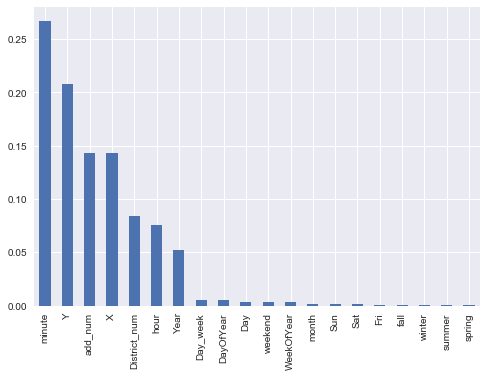

In [133]:
#feature_importances
feature_imp = pd.Series(clfrfn.feature_importances_,index= train[X].columns)
feature_imp.sort_values(ascending=False).plot(kind='Bar')

Kaggle score - 2.385 
The best result was obtained from Random Forest Classifier model with X_all as the features.